# Importing libraries

In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# Loading .xls

In [36]:
who = pd.read_csv('Life_Expectancy_Data.xls')

In [37]:
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Checking size of data frame (columns + rows)

In [82]:
len(who.columns)

22

In [83]:
len(who.index)

2938

# Checking for data types

In [50]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Checking amount of NaN's

In [64]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Country,0.00
1,Year,0.00
2,Status,0.00
3,life expectancy,0.34
4,Adult Mortality,0.34
5,infant deaths,0.00
6,Alcohol,6.60
7,percentage expenditure,0.00
8,Hepatitis B,18.82
9,Measles,0.00


# Replacing NaN with median

In [189]:
who.fillna(who.median(), inplace=True)

/var/folders/z7/h39z8zd55hb3q_stjqd0sqgm0000gn/T/ipykernel_3097/2090037703.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  who.fillna(who.median(), inplace=True)


In [190]:
who.isnull()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Dropping duplicates

In [191]:
who.drop_duplicates()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,12777511.0,9.4,0.407
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,12633897.0,9.8,0.418
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,125525.0,1.2,0.427
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,12366165.0,1.6,0.427


# Checking for column uniform names

In [167]:
who.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'population', 'thinness 1-19 years',
       'income composition of resources'],
      dtype='object')

# Standardizing column names

In [62]:
who.rename(columns={'Life expectancy ' : 'life expectancy'}, inplace=True)

In [65]:
who.rename(columns={'Measles '  : 'measles'}, inplace=True)

In [66]:
who.rename(columns={' BMI ' : 'bmi'}, inplace=True)

In [67]:
who.rename(columns={'under-five deaths ' : 'under-five deaths'}, inplace=True)

In [68]:
who.rename(columns={'Diphtheria ' : 'diphtheria'}, inplace=True)

In [69]:
who.rename(columns={' HIV/AIDS' : 'hiv/aids'}, inplace=True)

In [70]:
who.rename(columns={' thinness  1-19 years' : 'thinness 1-19 years'}, inplace=True)

In [71]:
who.rename(columns={' thinness 5-9 years' : 'thinness 5-9 years'}, inplace=True)

In [72]:
who.columns= who.columns.str.lower()

In [76]:
who.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

# Building correlation heatmap

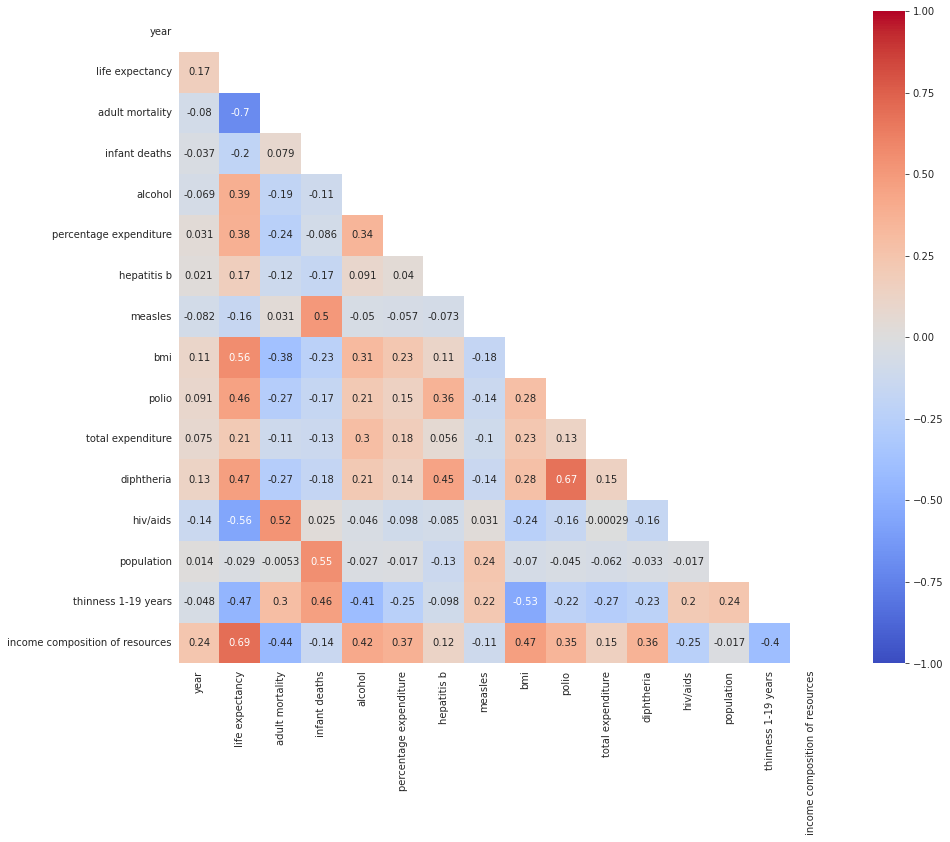

In [192]:
corr = who.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)





# Identifying highly correlated columns

In [193]:
corr_matrix=who.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.80)]



[]

# Dropping highly correlated columns

In [171]:
# who.drop(['under-five deaths', 'gdp', 'thinness 5-9 years', 'schooling'],axis=1,inplace=True)

KeyError: "['under-five deaths', 'gdp', 'thinness 5-9 years', 'schooling'] not found in axis"

# Dividing categoricals/numericals

In [194]:
who_categoricals = pd.concat([who['country'], who['status']], axis = 1)

In [230]:
who_categoricals

,country,status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [196]:
who_numericals = who._get_numeric_data()

In [197]:
who_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   life expectancy                  2938 non-null   float64
 2   adult mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   hepatitis b                      2938 non-null   float64
 7   measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   polio                            2938 non-null   float64
 10  total expenditure                2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv/aids            

# Defining X, y

In [198]:
X = who_numericals

In [199]:
X = X.drop(['life expectancy'], axis=1)

In [200]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   adult mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   hepatitis b                      2938 non-null   float64
 6   measles                          2938 non-null   int64  
 7   bmi                              2938 non-null   float64
 8   polio                            2938 non-null   float64
 9   total expenditure                2938 non-null   float64
 10  diphtheria                       2938 non-null   float64
 11  hiv/aids                         2938 non-null   float64
 12  population          

In [201]:
y = who_numericals['life expectancy']

In [202]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: life expectancy, Length: 2938, dtype: float64

# Data splitting

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

# Standardizing Data

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'adult mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'polio'}>,
        <AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'diphtheria'}>,
        <AxesSubplot:title={'center':'hiv/aids'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'income composition of resources'}>,
        <AxesSubplot:>]], dtype=object)

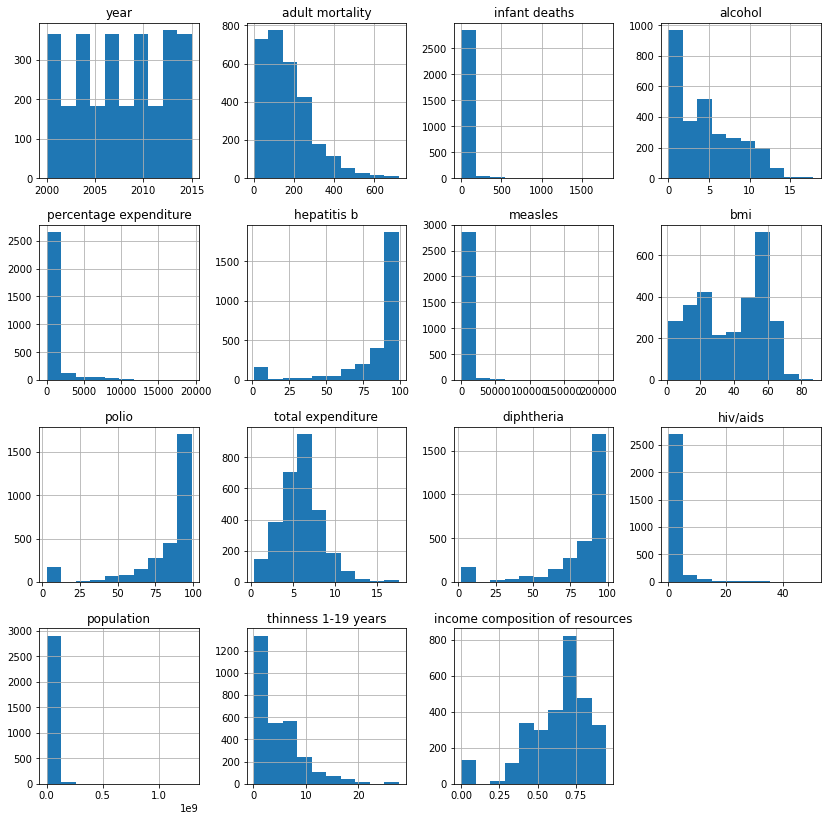

In [204]:
X.hist(figsize=(14,14))



In [205]:
std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)



In [206]:
X_test_scaled=std_scaler.transform(X_test)

# Fitting model



In [207]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

In [208]:
model.coef_



array([ 0.08167253, -2.88430681, -0.19628718,  0.6285344 ,  0.74431141,
       -0.47421736, -0.39522272,  1.03654864,  0.84702797,  0.18306606,
        1.17825452, -2.4067278 ,  0.11924654, -0.3677485 ,  2.80007549])

In [209]:
model.intercept_

69.2867659574468

# Making prediction

In [210]:
y_pred=model.predict(X_test_scaled)   

y_pred_train=model.predict(X_train_scaled)

# Evaluation model performance

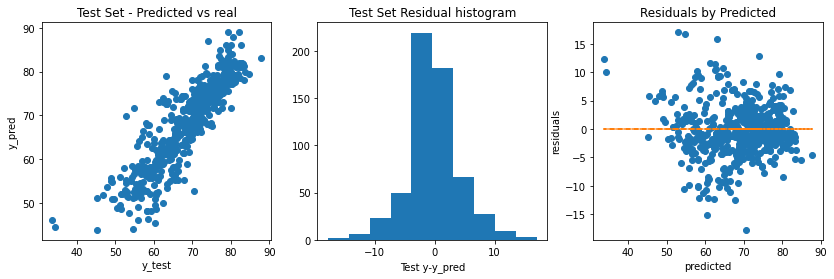

In [211]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

# Error metrics

In [216]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

18.81274837758736
3.128194817937392


In [217]:
R2=r2_score(y_test,y_pred)
R2

0.7829315762468494

# Checking numbers of categoricals for Hot Coding

In [224]:
who_categoricals.count()

country    2938
status     2938
dtype: int64

In [227]:
len(who_categoricals['country'].unique())

193

In [232]:
who_categoricals['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [228]:
len(who_categoricals['status'].unique())

2